### Notebook Used in the videos 1-4 of Basic NFL Data Analysis

I use this notebook for the Part 1 Playlist.
I've made them into 4 short videos ~5-6 minutes each.

Ram Narasimhan

Questions? Twitter: @ramnarasimhan

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
base = "https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/games_data/regular_season/reg_games_"
year = 2018
coda = ".csv"
url = base + str(year) + coda

In [5]:
url

'https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/games_data/regular_season/reg_games_2018.csv'

# Read in the Data

In [6]:
df = pd.read_csv(url)

In [7]:
df.shape

(256, 10)

In [8]:
df.columns

Index(['type', 'game_id', 'home_team', 'away_team', 'week', 'season',
       'state_of_game', 'game_url', 'home_score', 'away_score'],
      dtype='object')

In [9]:
df.head()

type     game_id home_team away_team  week  season state_of_game  \
0  reg  2018090600       PHI       ATL     1    2018          POST   
1  reg  2018090900       BAL       BUF     1    2018          POST   
2  reg  2018090907       NYG       JAX     1    2018          POST   
3  reg  2018090906        NO        TB     1    2018          POST   
4  reg  2018090905        NE       HOU     1    2018          POST   

                                            game_url  home_score  away_score  
0  http://www.nfl.com/liveupdate/game-center/2018...          18          12  
1  http://www.nfl.com/liveupdate/game-center/2018...          47           3  
2  http://www.nfl.com/liveupdate/game-center/2018...          15          20  
3  http://www.nfl.com/liveupdate/game-center/2018...          40          48  
4  http://www.nfl.com/liveupdate/game-center/2018...          27          20

In [10]:
# There are some columns that we don't want. Let's drop those
drop_columns = ['type', 'state_of_game', 'game_url']

In [11]:
# axis = 1 is to tell Pandas to drop the columns.
# inplace = True drops them permanently
df.drop(columns=drop_columns, axis=1, inplace=True)

In [12]:
df.shape # notice that 3 columns are gone. 10 --> 7 columns

(256, 7)

In [13]:
df.columns

Index(['game_id', 'home_team', 'away_team', 'week', 'season', 'home_score',
       'away_score'],
      dtype='object')

WIth this, the data ingestion part is complete. Next, let's examine the data itself

# Exploratory Data Analysis

Next, let's just look at the data that we've read

In [15]:
#How many unique NFL teams are there?
df['home_team'].nunique()

32

In [16]:
#What are the teams?
df['home_team'].unique()

array(['PHI', 'BAL', 'NYG', 'NO', 'NE', 'MIN', 'MIA', 'IND', 'CLE', 'LAC',
       'DEN', 'CAR', 'ARI', 'GB', 'DET', 'OAK', 'CIN', 'ATL', 'WAS',
       'TEN', 'TB', 'PIT', 'NYJ', 'BUF', 'SF', 'LA', 'JAX', 'DAL', 'CHI',
       'HOU', 'KC', 'SEA'], dtype=object)

### For how many weeks is the regular searson? Do they play the same number of games each week?

In [17]:
df['week'].unique() 

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
      dtype=int64)

So they play for a total of 17 weeks in a season.

In [19]:
#For each week, what is the Number of games? (Frequency) 
df['week'].value_counts() #notice that this is sorted in decreasing order

17    16
16    16
2     16
3     16
1     16
13    16
14    16
15    16
12    15
6     15
5     15
4     15
10    14
8     14
7     14
11    13
9     13
Name: week, dtype: int64

In [22]:
#If we sort the index, we can get this for each week, in time order.
df['week'].value_counts().sort_index()

1     16
2     16
3     16
4     15
5     15
6     15
7     14
8     14
9     13
10    14
11    13
12    15
13    16
14    16
15    16
16    16
17    16
Name: week, dtype: int64

Note that `value_counts()` gives us the FREQUENCY for each group. In this case, each group is the Week number. Pandas counts the number of rows (one game per row) for each week, and displays that when we go `df[column].value_counts()`

# Plotting

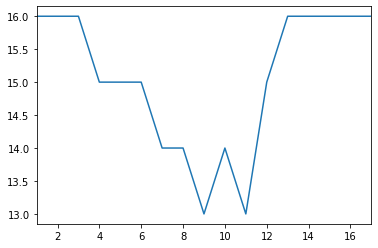

In [23]:
df['week'].value_counts().sort_index().plot()

This is okay, but not very readable. A bar plot is much better suited for this dataset.

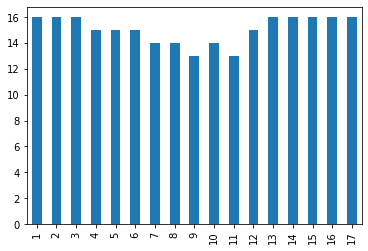

In [17]:
df['week'].value_counts().sort_index().plot(kind='bar')

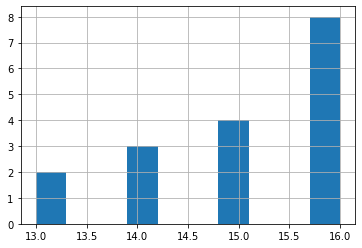

In [18]:
df['week'].value_counts().sort_index().hist()

## Histogram

Important to understand this: THe histogram gives the `number of games for each week` in the x-axis. For each value of x, the height of the histogram shows the number of weeks (frequency) there were that many games. Notice that the x-axis in the histogram can only take on 4 values: 13, 14, 15 or 16. This is because in an NFL week, there must be 13 to 16 games, no less and no more

### Let's see where a Histogram can be useful

How big or small is the home field advantage?

In [24]:
# We create a new column in the data frame and store it. 
# This column can take negative values (if the home team lost) or positive values (if the home team won)
df['home_adv_score'] = df['home_score'] - df['away_score']

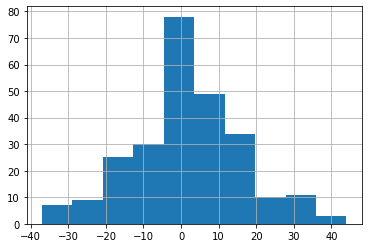

In [25]:
df['home_adv_score'].hist()

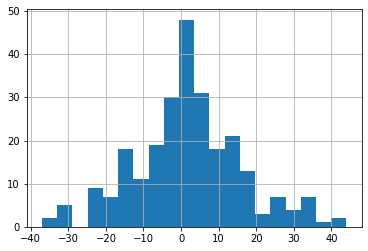

In [26]:
df['home_adv_score'].hist(bins=20)

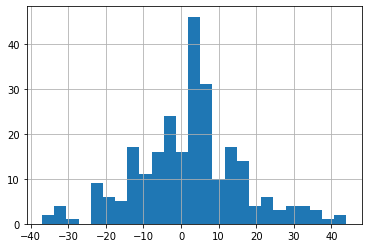

In [27]:
df['home_adv_score'].hist(bins=25)

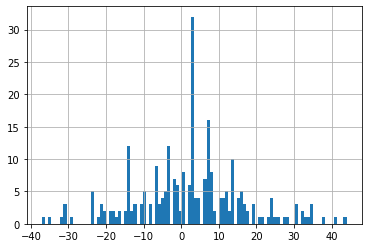

In [28]:
df['home_adv_score'].hist(bins=100)

Important Design choice: Because the number of bins is left to us, it is possible to convey different messages using a histogram. Therefore, we should give it some thought before choosing the right number of bins, to represent the data with as little personal bias as possible

# Scatter Plots (XY Plots)

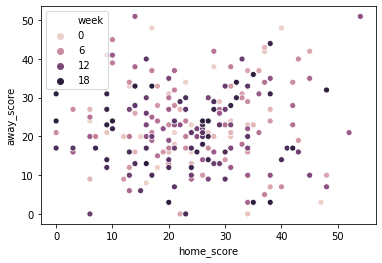

In [33]:
sns.scatterplot(data=df, x='home_score', y='away_score', hue='week')

In [29]:
df['home_win'] = df['home_adv_score'] > 0 # Create a new column

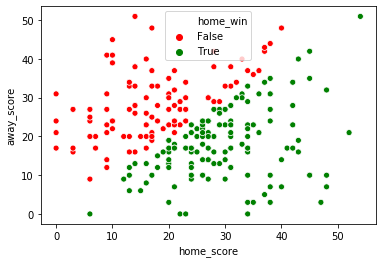

In [38]:
color_d = {True: 'green', False: 'red'}
sns.scatterplot(data=df, x='home_score', y='away_score', hue='home_win', palette = color_d)

In [31]:
df['home_win'].sum()/len(df) * 100

59.765625

So the Home Teams win 60% of the games. Is this typical? Try this for other years.

End of Part 1 of our Basic Data Analysis